<a href="https://colab.research.google.com/github/craigm-c/antimicrobial_peptides/blob/main/antimicrobial_peptide_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary

This notebook focuses on predicting antimicrobial activity of short peptides based on on the amino acid properties computed by the Pfeature package. Three Pfeature property datasets are used to build our classification models; animo acid composition, physico-chemical properties and pseudo-amino acid composition.

The lazypredict library was used fit 29 different models to these three datasets and the best performing models were found to be support vector classifiers. Hyperparameter optimisation was performed on the support vector classifiers to optimse performance and the three models all resulted in similar performance:

---------------------------------------------------------------------------

Amino acid composition - Nu-Support vector classifier:

Accuracy - 0.77 	 Precision -  0.72	 Recall - 0.85	 F1 score - 0.78

---------------------------------------------------------------------------

Physico-chemical properties - Support Vector Classifier

Accuracy - 0.75 	 Precision -  0.73	 Recall - 0.78	 F1 score - 0.75

---------------------------------------------------------------------------

Pseudo amino acid composition - n-Support Vector Classifier

Accuracy - 0.76 	 Precision -  0.72 	Recall - 0.84	 F1 score - 0.78

---------------------------------------------------------------------------

#Mounting gdrive and downloading and Installing packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install lazypredict

In [3]:
import lazypredict

In [4]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-08-23 19:53:06--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   124MB/s    in 0.7s    

2023-08-23 19:53:06 (124 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-h

In [5]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2023-08-23 19:53:33--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2023-08-23 19:53:33--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519486 (507K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 507.31K  --.-KB/s    in 0.09s   

2023-08-23 19:53:34 (5.54 MB/s) - ‘Pfeature.zip’ saved [519486/519486]



In [6]:
! unzip Pfeature.zip

Archive:  Pfeature.zip
   creating: Pfeature/
  inflating: Pfeature/PKG-INFO       
   creating: __MACOSX/
   creating: __MACOSX/Pfeature/
  inflating: __MACOSX/Pfeature/._PKG-INFO  
  inflating: Pfeature/README         
  inflating: __MACOSX/Pfeature/._README  
  inflating: Pfeature/setup.py       
  inflating: __MACOSX/Pfeature/._setup.py  
  inflating: Pfeature/Functions_Tables.pdf  
  inflating: __MACOSX/Pfeature/._Functions_Tables.pdf  
   creating: Pfeature/build/
   creating: Pfeature/build/lib/
   creating: Pfeature/build/lib/Pfeature/
  inflating: Pfeature/build/lib/Pfeature/bonds.csv  
   creating: __MACOSX/Pfeature/build/
   creating: __MACOSX/Pfeature/build/lib/
   creating: __MACOSX/Pfeature/build/lib/Pfeature/
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._bonds.csv  
  inflating: Pfeature/build/lib/Pfeature/pfeature.py  
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._pfeature.py  
  inflating: Pfeature/build/lib/Pfeature/AAIndexNames.csv  
  inflating: __MACOSX

In [7]:
! python Pfeature/setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
package init file 'Pfeature/__init__.py' not found (or not a regular file)
creating build
creating build/lib
creating build/lib/Pfeature
copying Pfeature/setup.py -> build/lib/Pfeature
error: can't copy 'Pfeature/ONTAINER-LICENSE': doesn't exist or not a regular file


In [8]:
! conda install -c bioconda cd-hit -y

Solving environment: | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.05.30 |       h06a4308_0         120 KB
    cd-hit-4.8.1               |       hdbcaa40_0         221 KB  bioconda
    certifi-2020.6.20          |     pyhd3eb1b0_3         155 KB
    openssl-1.1.1v             |       h7f8727e_0         3.7 MB
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  cd-hit             bioconda/linux-64::cd-hit-4.8.1-hdbcaa40_0

The following packages wil

# Copying peptide data and removing redundant peptide sequences using cd-hit

Taken from https://app.cbbio.online/ampep/dataset

In [10]:
!cp -r /content/drive/MyDrive/antimicrobial_classification/train/train* .

In [13]:
!head -n 10 train_po.fasta

>amp5_30_1
ACSAG
>amp5_30_2
AMVGT
>amp5_30_3
AMVSS
>amp5_30_4
CPFVC
>amp5_30_5
SPGGA


In [15]:
!cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Wed Aug 23 19:56:05 2023
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485873

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [16]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Wed Aug 23 19:56:05 2023
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.10


In [17]:
!head -n 10 train_po_cdhit.txt

>amp5_30_85
AVPDVAFNAYG
>amp5_30_86
CTTCECCCSCS
>amp5_30_87
EPHPDEFVGLM
>amp5_30_88
EPHPNEFVGLM
>amp5_30_89
EPNPDEFFGLM


In [18]:
!head -n 10 train_ne_cdhit.txt

>nonamp5_30_85
GRGGSSNYVRL
>nonamp5_30_86
GSTGLIPFGRT
>nonamp5_30_87
PAPESGFIRDP
>nonamp5_30_89
GASGLIPFPRL
>nonamp5_30_90
SANTKNDFMRF


# Importing modules and defining functions to apply Pfeature computations

In [ ]:
import pandas as pd

In [ ]:
# Amino acid composition (AAC)

from Pfeature.Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in


In [ ]:
# Physico-chemical properties (PCP)

from Pfeature.Pfeature.pfeature import pcp_wp

def pcp(input):
  a = input.rstrip('txt')
  output = a + 'pcp.csv'
  df_out = pcp_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

In [ ]:
# Pseudo amino acid composition (PAAC)

from Pfeature.Pfeature.pfeature import paac_wp

def paac(input):
  a = input.rstrip('txt')
  output = a + 'paac.csv'
  df_out = paac_wp(input, output, 1, 2)
  df_in = pd.read_csv(output)
  return df_in

# Defining and running function for building dataframes containing Pfeature  computation for each peptide in the dataset

Three dataframes are made for the three Pfeature properties we are interested in: amino acid composition, physico-chemical properties and pseudo amino acid composition

In [ ]:
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature_aac = feature_calc(pos, neg, aac) # AAC
feature_pcp = feature_calc(pos, neg, pcp) # PCP
feature_paac = feature_calc(pos, neg, paac) # PAAC


#Checking Pfeature has run correctly

In [ ]:
feature_aac.head()

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,positive


In [ ]:
feature_pcp.head()

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,class
0,0.00,0.09,0.91,0.09,0.73,0.64,0.09,0.18,0.09,0.00,...,0.18,0.36,0.82,0.18,-0.34,-0.83,0.49,-0.48,0.23,positive
1,0.00,0.09,0.91,0.91,0.00,0.00,0.00,0.00,0.09,0.00,...,0.36,0.73,0.91,0.09,1.31,-1.48,2.02,-0.70,-1.42,positive
2,0.09,0.27,0.64,0.00,0.64,0.46,0.18,0.09,0.27,0.09,...,0.36,0.09,0.46,0.55,-0.23,-0.21,0.41,-0.29,0.29,positive
3,0.09,0.18,0.73,0.00,0.64,0.46,0.18,0.09,0.18,0.09,...,0.36,0.09,0.46,0.55,-0.32,-0.15,0.33,-0.17,0.07,positive
4,0.00,0.27,0.73,0.00,0.64,0.36,0.18,0.18,0.27,0.00,...,0.27,0.09,0.46,0.55,-0.33,0.17,0.72,-0.62,0.08,positive


In [ ]:
feature_paac.head()

,PAAC1_A,PAAC1_C,PAAC1_D,PAAC1_E,PAAC1_F,PAAC1_G,PAAC1_H,PAAC1_I,PAAC1_K,PAAC1_L,...,PAAC1_P,PAAC1_Q,PAAC1_R,PAAC1_S,PAAC1_T,PAAC1_V,PAAC1_W,PAAC1_Y,PAAC1_lam1,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09,0.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00,0.03,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,0.06,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,0.06,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,positive


#Splitting dataframes into features and labels

In [ ]:
X_aac = feature_aac.drop('class', axis=1)
y_aac = feature_aac['class'].copy()

In [ ]:
X_pcp = feature_pcp.drop('class', axis=1)
y_pcp = feature_pcp['class'].copy()

In [ ]:
X_paac = feature_paac.drop('class', axis=1)
y_paac = feature_paac['class'].copy()

In [ ]:
X_aac.shape

(2759, 20)

In [ ]:
X_pcp.shape

(2759, 30)

In [ ]:
X_paac.shape

(2759, 21)

#Converting positive and negative labels into 1 and 0 for use with models

In [ ]:
y_aac = y_aac.map({"positive": 1, "negative": 0})
y_pcp = y_pcp.map({"positive": 1, "negative": 0})
y_paac = y_paac.map({"positive": 1, "negative": 0})

#Spliting the data into train and test sets then using lazypredict to implement and fit 29 models with the data and return evaluation metrics

This is performed three times for the three datasets we have, in all cases either a Nu-support vector classifier or support vector classifier model has the best performnace.

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Data split
X_aac_train, X_aac_test, y_aac_train, y_aac_test = train_test_split(X_aac, y_aac, test_size=0.2, random_state =42, stratify=y_aac)
# Defines and builds the lazyclassifier
clf_aac = LazyClassifier(verbose=0,ignore_warnings=True)
models_train_aac,predictions_aac = clf_aac.fit(X_aac_train, X_aac_test, y_aac_train, y_aac_test)


100%|██████████| 29/29 [00:09<00:00,  2.97it/s]


In [ ]:
models_train_aac

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.75,0.76,0.76,0.75,0.59
SVC,0.75,0.75,0.75,0.75,0.53
KNeighborsClassifier,0.73,0.73,0.73,0.73,0.29
QuadraticDiscriminantAnalysis,0.72,0.72,0.72,0.72,0.07
AdaBoostClassifier,0.71,0.71,0.71,0.71,0.39
CalibratedClassifierCV,0.71,0.71,0.71,0.71,1.47
LogisticRegression,0.71,0.71,0.71,0.71,0.07
LGBMClassifier,0.71,0.71,0.71,0.71,0.22
LinearSVC,0.70,0.71,0.71,0.70,0.37


In [ ]:
# Data split
X_pcp_train, X_pcp_test, y_pcp_train, y_pcp_test = train_test_split(X_pcp, y_pcp, test_size=0.2, random_state =42, stratify=y_pcp)
# Defines and builds the lazyclassifier
clf_pcp = LazyClassifier(verbose=0,ignore_warnings=True)
models_train_pcp,predictions_train_pcp = clf_pcp.fit(X_pcp_train, X_pcp_test, y_pcp_train, y_pcp_test)

100%|██████████| 29/29 [00:07<00:00,  4.09it/s]


In [ ]:
models_train_pcp

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.75,0.75,0.75,0.75,0.38
NuSVC,0.74,0.74,0.74,0.74,0.44
LogisticRegression,0.71,0.71,0.71,0.71,0.08
CalibratedClassifierCV,0.71,0.71,0.71,0.71,1.28
KNeighborsClassifier,0.71,0.71,0.71,0.71,0.05
LinearDiscriminantAnalysis,0.70,0.71,0.71,0.70,0.05
LinearSVC,0.70,0.71,0.71,0.70,0.37
RidgeClassifier,0.70,0.70,0.70,0.70,0.03
RidgeClassifierCV,0.70,0.70,0.70,0.70,0.04


In [ ]:
# Data split
X_paac_train, X_paac_test, y_paac_train, y_paac_test = train_test_split(X_paac, y_paac, test_size=0.2, random_state =42, stratify=y_paac)
# Defines and builds the lazyclassifier
clf_paac = LazyClassifier(verbose=0,ignore_warnings=True)
models_train_paac,predictions_train_paac = clf_paac.fit(X_paac_train, X_paac_test, y_paac_train, y_paac_test)


100%|██████████| 29/29 [00:05<00:00,  5.37it/s]


In [ ]:
models_train_paac

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.76,0.76,0.76,0.76,0.37
SVC,0.76,0.76,0.76,0.76,0.31
QuadraticDiscriminantAnalysis,0.73,0.74,0.74,0.73,0.03
KNeighborsClassifier,0.73,0.74,0.74,0.73,0.05
AdaBoostClassifier,0.73,0.73,0.73,0.73,0.25
CalibratedClassifierCV,0.71,0.71,0.71,0.71,1.03
LogisticRegression,0.71,0.71,0.71,0.71,0.04
LinearDiscriminantAnalysis,0.71,0.71,0.71,0.71,0.04
LinearSVC,0.71,0.71,0.71,0.71,0.26


# Hyperparameter tuning using random grid method

The support vector classifier models are optimsed using the three datasets we are working with and the best parameter combinations are displayed in the tables

In [ ]:
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
svc_aac_random = NuSVC()

# Define the parameter grid with ranges for hyperparameters
param_dist = {
    'nu': [0.1, 0.5, 0.9],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],

}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(svc_aac_random, param_distributions=param_dist, n_iter=30, cv=3, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV on your data
random_search.fit(X_aac_train, y_aac_train)

RandomizedSearchCV(cv=3, estimator=NuSVC(), n_iter=30,
                   param_distributions={'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'nu': [0.1, 0.5, 0.9]},
                   random_state=42, scoring='accuracy')

In [ ]:
performances = pd.DataFrame.from_dict(random_search .cv_results_)
performances.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nu,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.11,0.00,0.05,0.00,0.50,rbf,scale,"{'nu': 0.5, 'kernel': 'rbf', 'gamma': 'scale'}",0.74,0.73,0.76,0.74,0.01,1
4,0.11,0.01,0.02,0.00,0.50,poly,scale,"{'nu': 0.5, 'kernel': 'poly', 'gamma': 'scale'}",0.74,0.74,0.75,0.74,0.01,2
16,0.15,0.01,0.02,0.00,0.50,poly,auto,"{'nu': 0.5, 'kernel': 'poly', 'gamma': 'auto'}",0.74,0.74,0.75,0.74,0.01,2
8,0.10,0.00,0.06,0.00,0.90,rbf,scale,"{'nu': 0.9, 'kernel': 'rbf', 'gamma': 'scale'}",0.73,0.71,0.71,0.72,0.01,4
2,0.14,0.00,0.06,0.00,0.90,linear,scale,"{'nu': 0.9, 'kernel': 'linear', 'gamma': 'scale'}",0.72,0.71,0.72,0.71,0.01,5


In [ ]:
svc_pcp_random = SVC()

# Define the parameter grid with ranges for hyperparameters
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [-1, 0, 1],
    'shrinking': [True, False],
}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(svc_pcp_random, param_distributions=param_dist, n_iter=30, cv=3, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV on your data
random_search.fit(X_pcp_train, y_pcp_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=30,
                   param_distributions={'C': [0.1, 1, 10], 'coef0': [-1, 0, 1],
                                        'degree': [2, 3, 4],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   random_state=42, scoring='accuracy')

In [ ]:
performances = pd.DataFrame.from_dict(random_search .cv_results_)
performances.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_shrinking,param_kernel,param_degree,param_coef0,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
20,0.18,0.00,0.03,0.00,True,poly,4,0,10,"{'shrinking': True, 'kernel': 'poly', 'degree'...",0.73,0.73,0.73,0.73,0.00,1
14,0.18,0.00,0.06,0.00,False,poly,4,1,0.10,"{'shrinking': False, 'kernel': 'poly', 'degree...",0.73,0.72,0.74,0.73,0.01,2
19,0.09,0.00,0.03,0.00,True,poly,4,1,0.10,"{'shrinking': True, 'kernel': 'poly', 'degree'...",0.73,0.72,0.74,0.73,0.01,2
2,0.14,0.01,0.03,0.00,True,poly,4,1,1,"{'shrinking': True, 'kernel': 'poly', 'degree'...",0.73,0.73,0.73,0.73,0.00,4
9,0.43,0.02,0.06,0.00,False,poly,4,1,1,"{'shrinking': False, 'kernel': 'poly', 'degree...",0.73,0.73,0.73,0.73,0.00,4


In [ ]:
svc_paac_random = NuSVC()

# Define the parameter grid with ranges for hyperparameters
param_dist = {
    'nu': [0.1, 0.5, 0.9],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],

}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(svc_paac_random, param_distributions=param_dist, n_iter=30, cv=3, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV on your data
random_search.fit(X_paac_train, y_paac_train)

RandomizedSearchCV(cv=3, estimator=NuSVC(), n_iter=30,
                   param_distributions={'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'nu': [0.1, 0.5, 0.9]},
                   random_state=42, scoring='accuracy')

In [ ]:
performances = pd.DataFrame.from_dict(random_search .cv_results_)
performances.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nu,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.12,0.01,0.06,0.01,0.50,rbf,scale,"{'nu': 0.5, 'kernel': 'rbf', 'gamma': 'scale'}",0.74,0.73,0.76,0.74,0.01,1
4,0.12,0.01,0.03,0.00,0.50,poly,scale,"{'nu': 0.5, 'kernel': 'poly', 'gamma': 'scale'}",0.74,0.74,0.75,0.74,0.01,2
16,0.27,0.02,0.05,0.00,0.50,poly,auto,"{'nu': 0.5, 'kernel': 'poly', 'gamma': 'auto'}",0.74,0.74,0.75,0.74,0.01,2
1,302.83,21.57,0.03,0.01,0.50,linear,scale,"{'nu': 0.5, 'kernel': 'linear', 'gamma': 'scale'}",0.72,0.72,0.72,0.72,0.00,4
13,317.93,32.33,0.02,0.00,0.50,linear,auto,"{'nu': 0.5, 'kernel': 'linear', 'gamma': 'auto'}",0.72,0.72,0.72,0.72,0.00,4


# Final Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


#Amino acid composition - n-Support Vector Classifier

In [ ]:
from sklearn import metrics

nu_svc_aac_tuned = NuSVC(nu=0.5, kernel='rbf', gamma='scale')
nu_svc_aac_tuned.fit(X_aac_train, y_aac_train)

y_pred = nu_svc_aac_tuned.predict(X_aac_test)

accuracy = accuracy_score(y_aac_test, y_pred)
precision = precision_score(y_aac_test, y_pred)
recall = recall_score(y_aac_test, y_pred)
f1 = f1_score(y_aac_test, y_pred)

metrics = {'Accuracy':[accuracy],
          'Precision': [precision],
          'Recall': [recall],
          'F1 score': [f1]
         }

metrics_df = pd.DataFrame(metrics)
metrics_df

,Accuracy,Precision,Recall,F1 score
0,0.77,0.72,0.85,0.78


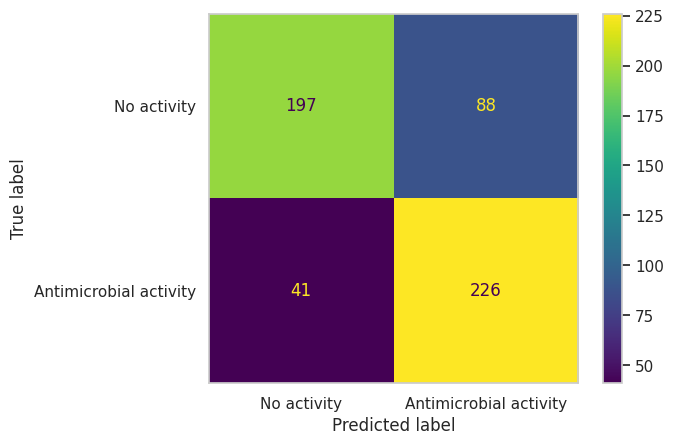

In [ ]:
cm = confusion_matrix(y_aac_test, y_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels=['No activity', 'Antimicrobial activity'],
                                )
cm_plot.plot(cmap='viridis')
plt.grid(False)
plt.show()

# Physico-chemical properties (PCP) - Support Vector Classifier

In [ ]:
svc_pcp_tuned = SVC(C=10, kernel='poly', degree=4, coef0=0, shrinking=True )

svc_pcp_tuned.fit(X_pcp_train, y_pcp_train)

y_pred = svc_pcp_tuned.predict(X_pcp_test)

accuracy = accuracy_score(y_aac_test, y_pred)
precision = precision_score(y_aac_test, y_pred)
recall = recall_score(y_aac_test, y_pred)
f1 = f1_score(y_aac_test, y_pred)

metrics = {'Accuracy':[accuracy],
          'Precision': [precision],
          'Recall': [recall],
          'F1 score': [f1]
         }

metrics_df = pd.DataFrame(metrics)
metrics_df

,Accuracy,Precision,Recall,F1 score
0,0.75,0.73,0.78,0.75


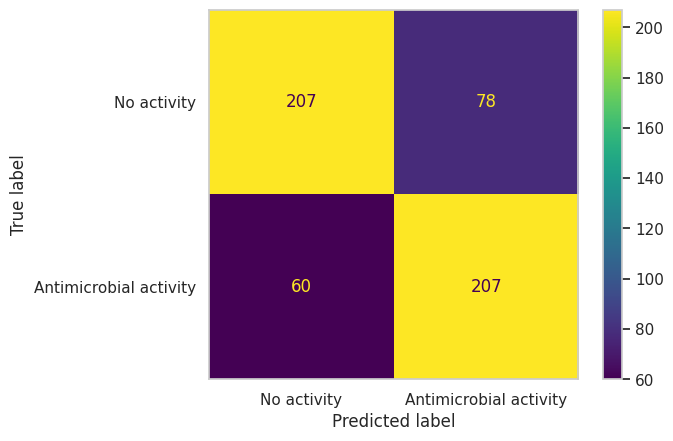

In [ ]:
cm = confusion_matrix(y_pcp_test, y_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels=['No activity', 'Antimicrobial activity'],
                                )
cm_plot.plot(cmap='viridis')
plt.grid(False)
plt.show()

#Pseudo amino acid composition - n-Support Vector Classifier

In [ ]:
nu_svc_paac = NuSVC(nu=0.5, kernel='rbf', gamma='scale')

nu_svc_paac.fit(X_paac_train, y_paac_train)

y_pred = nu_svc_paac.predict(X_paac_test)

accuracy = accuracy_score(y_aac_test, y_pred)
precision = precision_score(y_aac_test, y_pred)
recall = recall_score(y_aac_test, y_pred)
f1 = f1_score(y_aac_test, y_pred)

metrics = {'Accuracy':[accuracy],
          'Precision': [precision],
          'Recall': [recall],
          'F1 score': [f1]
         }

metrics_df = pd.DataFrame(metrics)
metrics_df

,Accuracy,Precision,Recall,F1 score
0,0.76,0.72,0.84,0.78


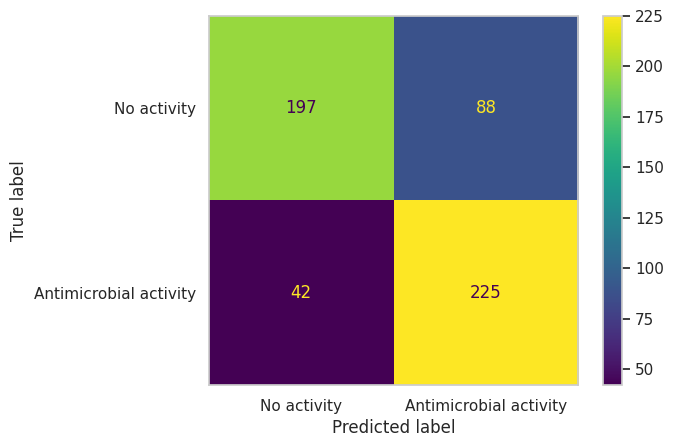

In [ ]:
cm = confusion_matrix(y_paac_test, y_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels=['No activity', 'Antimicrobial activity'],
                                )
cm_plot.plot(cmap='viridis')
plt.grid(False)
plt.show()